Universidad Konrad Lorenz

Electiva de Redes Sociales

Trabajo presentado por:

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.drawing.layout import kamada_kawai_layout
from networkx.drawing.nx_agraph import graphviz_layout
import urllib.request
import gzip
import os

1. Averigüe quién creo el dataset "Facebook Social Network", qué datos trae y qué ayuda a representar

In [12]:
def download_facebook_dataset(url, output_path):
    """Descarga y extrae el dataset de Facebook si no existe."""
    if not os.path.exists(output_path):
        print("Descargando dataset de Facebook...")
        urllib.request.urlretrieve(url, output_path + ".gz")
        with gzip.open(output_path + ".gz", 'rb') as f_in, open(output_path, 'wb') as f_out:
            f_out.write(f_in.read())
        os.remove(output_path + ".gz")
    else:
        print("El dataset ya está descargado.")

In [13]:
def load_facebook_graph(file_path):
    """Carga la red de Facebook desde un archivo de texto."""
    G = nx.read_edgelist(file_path, nodetype=int)
    return G

In [14]:
def plot_graph(G, layout='fr', title='Graph Visualization'):
    """Visualiza la red con el algoritmo de layout especificado."""
    plt.figure(figsize=(10, 8))

    if layout == 'fr':
        pos = nx.spring_layout(G, seed=42)  # Fruchterman-Reingold
    elif layout == 'kk':
        pos = kamada_kawai_layout(G)  # Kamada-Kawai
    elif layout == 'mds':
        pos = nx.kamada_kawai_layout(G)  # MDS usa Kamada-Kawai en NetworkX
    elif layout == 'sugiyama':
        pos = graphviz_layout(G, prog='dot')  # Sugiyama usa Graphviz
    elif layout == 'davis_harel':
        pos = nx.spring_layout(G, seed=42, k=0.1, iterations=50)  # Aproximación a Davis-Harel con spring layout
    else:
        raise ValueError("Layout no soportado")

    nx.draw(G, pos, node_size=10, edge_color='gray', alpha=0.6, with_labels=False)
    plt.title(title)
    plt.show()

In [15]:
def show_sample_edges(G, num_edges=5):
    """Muestra algunas relaciones (amistades) de la red."""
    edges = list(G.edges())[:num_edges]
    print("Algunas conexiones en la red:")
    for edge in edges:
        print(f"Usuario {edge[0]} está conectado con Usuario {edge[1]}")

In [16]:
def show_sample_edges(G, num_edges=5):
    """Muestra algunas relaciones (amistades) de la red."""
    edges = list(G.edges())[:num_edges]
    print("Algunas conexiones en la red:")
    for edge in edges:
        print(f"Usuario {edge[0]} está conectado con Usuario {edge[1]}")

In [21]:
def show_neighbors(G, node):
    """Muestra los vecinos (amigos) de un nodo."""
    neighbors = list(G.neighbors(node))
    print(f"Los vecinos del nodo {node} son: {neighbors}")

2. Averigüe y describa de forma sencilla y con sus plabras en qué consiste el algorimto Kamada - Kawai, para qué sirve, qué mejora en el análisis de redes

3. En qué se deiferencia el MDS y el Kamada Kawai

In [18]:
# Descargar el dataset si no está disponible
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
file_path = "facebook_combined.txt"
download_facebook_dataset(url, file_path)

# Cargar el dataset
G = load_facebook_graph(file_path)

El dataset ya está descargado.


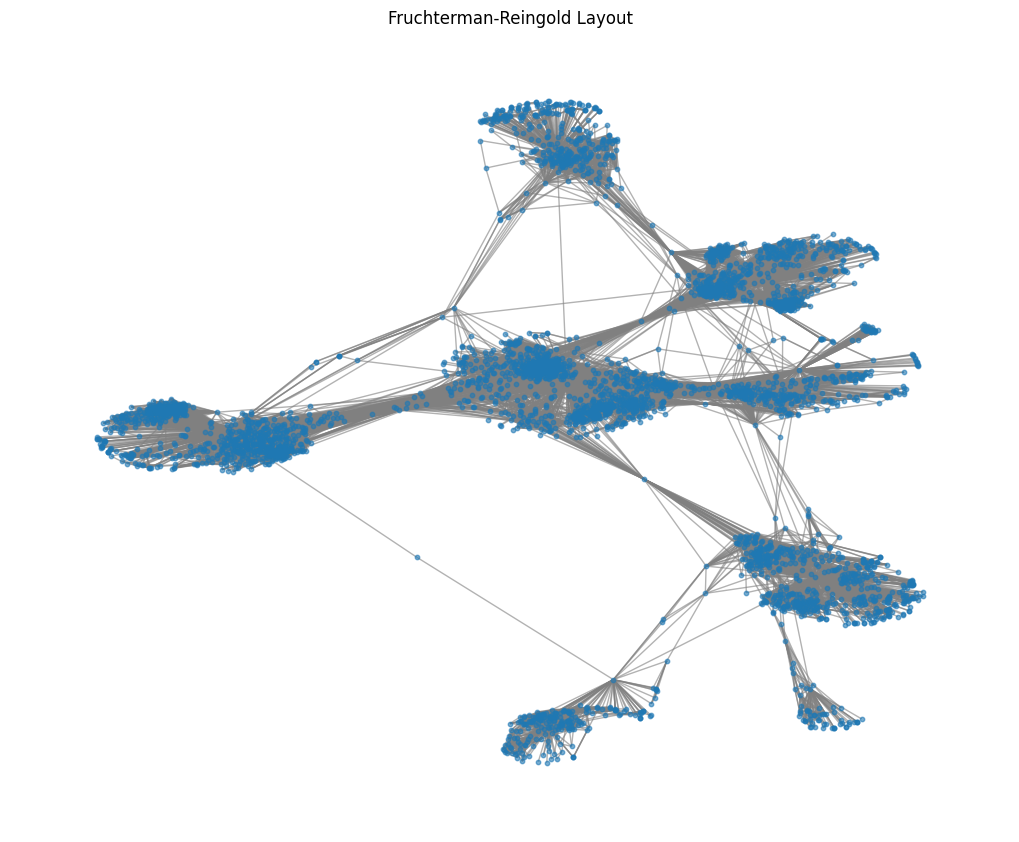

In [19]:
# Visualizar con diferentes layouts
plot_graph(G, layout='fr', title='Fruchterman-Reingold Layout')


In [ ]:
plot_graph(G, layout='kk', title='Kamada-Kawai Layout')


In [ ]:
plot_graph(G, layout='mds', title='MDS Layout')


In [ ]:
plot_graph(G, layout='sugiyama', title='Sugiyama Layout')

4. Describa las diferencias que encuentra en las visualizaciones de cada red

In [22]:
# Mostrar algunas relaciones en la red
show_sample_edges(G, num_edges=5)

# Mostrar los amigos de un nodo específico (ejemplo con nodo 0)
show_neighbors(G, node=0)


Algunas conexiones en la red:
Usuario 0 está conectado con Usuario 1
Usuario 0 está conectado con Usuario 2
Usuario 0 está conectado con Usuario 3
Usuario 0 está conectado con Usuario 4
Usuario 0 está conectado con Usuario 5
Los vecinos del nodo 0 son: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,

6. ¿Cómo puede interpretar los resultados de las relaciones entre usuarios y vecinos?